<Axes: >

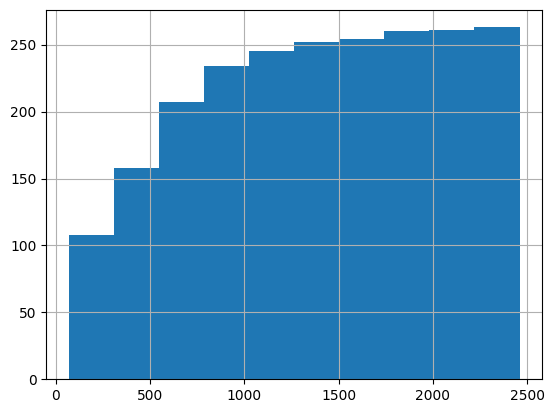

In [63]:

import numpy as np
import pandas as pd
data_path=""
df=pd.read_csv(data_path+"Hitters.csv", index_col=0)
df.describe()

df['Salary'].hist(cumulative=True)

<Axes: >

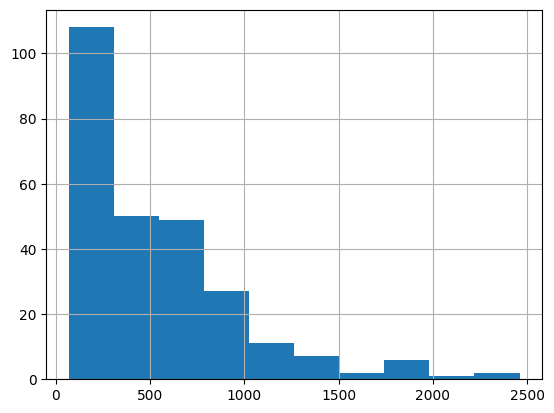

In [64]:
df['Salary'].hist()

In [65]:
df[['AtBat', 'Hits', 'HmRun', 'Runs']].corr()


,AtBat,Hits,HmRun,Runs
AtBat,1.000000,0.967939,0.592198,0.913060
Hits,0.967939,1.000000,0.562158,0.922187
HmRun,0.592198,0.562158,1.000000,0.650988
Runs,0.913060,0.922187,0.650988,1.000000


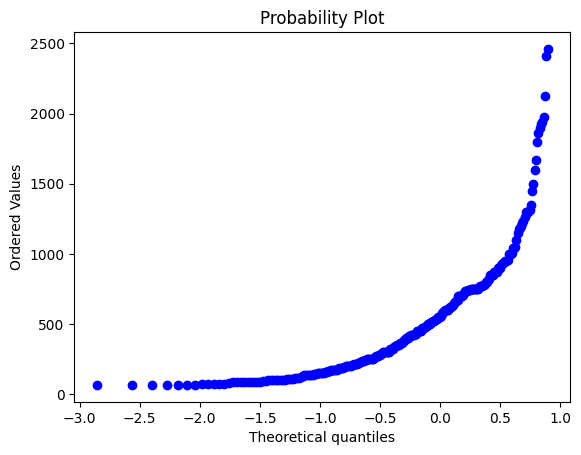

In [66]:
import scipy.stats as stats
import matplotlib.pyplot as plt
ax=plt.axes()
stats.probplot(df['Salary'].to_numpy(), plot=ax)
plt.show()

<Axes: >

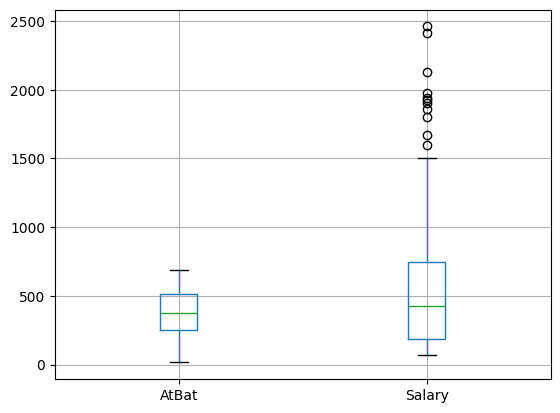

In [67]:
df[['AtBat', 'Salary']].boxplot()


In [74]:
import pandas as pd
data_path=""
Auto=pd.read_csv(data_path+"Auto.csv")
Auto.describe()



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [75]:
Auto.drop(['mpg'])


KeyError: "['mpg'] not found in axis"

In [76]:

Y = Auto['mpg']
X = Auto[['acceleration', 'displacement', 'weight']]
X = np.column_stack([np.ones(Y.shape[0]), X])

b=np.linalg.pinv(X.T@X)@X.T@Y
b

array([ 4.12439190e+01,  1.76438917e-01, -1.09432135e-02, -6.17952396e-03])

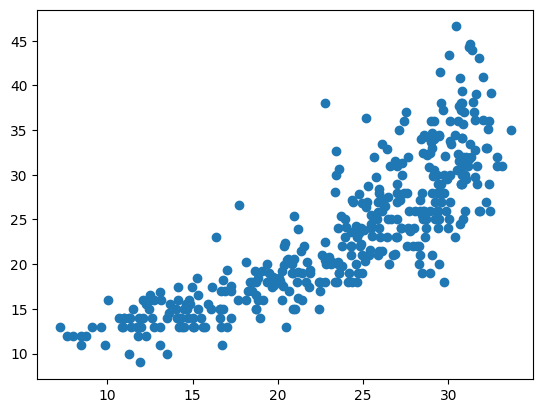

In [79]:
import scipy.stats as stats

k=len(b)-1
n=Y.shape[0]
SSE=np.sum(np.square(Y-(X@b)))
var=SSE/(n-k-1)
S=np.sqrt(var)

Syy=(n*np.sum(np.square(Y)) - np.square(np.sum(Y)))/n
SSR = Syy - SSE

sig_statistic = (SSR/k)/S

sig_statistic

p_val = stats.f.sf(sig_statistic, k, n-k-1)
p_val

plt.scatter(X@b, Y)


In [50]:
Rsq=SSR/Syy
Rsq

0.7004763398988025

In [86]:
c=np.linalg.pinv(X.T @ X)*var
i=3     # testa i = 1, 2, 3 etc. weight, alltså i=3, verkar vara den enda som är relevant.
b_statistic = b[i] / (S*np.sqrt(c[i,i]))       # Kolla film 31 jan 10:25 och framåt
p_b=2*min(stats.t.cdf(b_statistic, n-k-1), stats.t.sf(b_statistic,n-k-1))

p_b


0.05311852314074285

In [ ]:
# Kolla året vs bränsleförbrukninge på filmen, 10:30-

In [78]:
Z=Auto['mpg']


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 397, dtype: float64